# Data Visualisation

This is a brief file demonstrating how to create various figues using Pandas and matplotlib.
This builds on the basic introduction and will be a general place for reference to visualisation methods and as such will be updated as we learn new/better approaches and resolve problems.

### Importing Data Modules 
As ever we begin by importing data modules so that we have all the tools we need.

We also set Jupyter to place our figues as inline images.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Time to Get Some Data
This data comes from an excel file and contains food prices for Christmas foods.

Data is hosted in the microsoft cloud <a href="https://onedrive.live.com/view.aspx?resid=43EBDBC5D5265516!10892&ithint=file%2cxlsx&app=Excel&authkey=!AMjmJ1zXKzkIbKg">here</a>.

We let pandas do the hard work of reading data from excel to save us having to convert to a csv or some such. We also set the index to be the product family column rather than relying on a default 0 based numerical index.

In [2]:
food_data = pd.read_excel('./Data/Xmas Food Prices.xlsx', index_col = 'Product Family')

### Initial Plots

#### Scatter Plots
Let's start by considering some simple relationships in the data using scatter plots. 
First something that should have a simple answer - how does the price of frozen turkey vary with the price of fresh turkey?

We use the .ix index method on Pandas dataframes in order to strip out the rows desired for plotting.

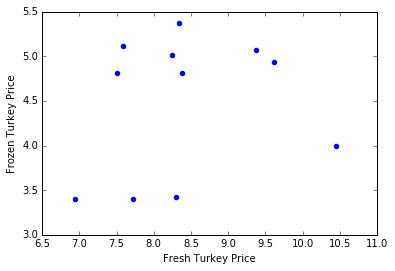

In [3]:
fresh_turkey_prices = food_data.ix['Fresh Turkey']
frozen_turkey_prices = food_data.ix['Frozen Turkey']
plt.scatter(fresh_turkey_prices, frozen_turkey_prices, color='blue')
plt.xlabel('Fresh Turkey Price')
plt.ylabel('Frozen Turkey Price')

Seems there isn't much of a relationship at all.

This data is taken from a tutorial on plotting so we should question its validity as a dataset. Still, we now know how to do simple scatter plots.

Let's now find refuge in alcohol and plot multiple data series on one chart. For this to occur they must have the same x variable so let's look at prices over time.

To get the set of years we can use the fact that casting a pandas dataframe to a list returns the column headers as a list.

Since we now have two data series we should add a legend, there's data in the upper right corder so let's put it out of the way in the upper left corner.

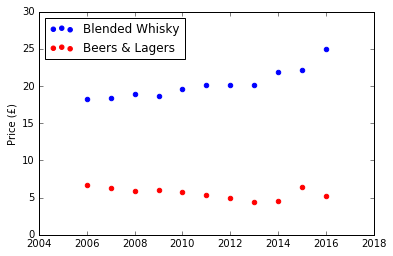

In [4]:
time = list(food_data)
whisky = food_data.ix['Blended Whisky']
beer = food_data.ix['Beers & Lagers']
plt.scatter(time, whisky, color='blue')
plt.scatter(time, beer, color='red')
plt.ylabel('Price (£)')
plt.legend(loc='upper left')

#### Bar Charts

A different type of chart. Let's start by looking at our data to make sure its suitable for a bar chart.

In [5]:
food_data

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Product Family,,,,,,,,,,,
Beers & Lagers,6.73,6.28,5.82,6.07,5.71,5.38,4.99,4.46,4.49,6.36,5.26
Blended Whisky,18.26,18.42,18.90,18.68,19.54,20.16,20.09,20.18,21.83,22.20,24.98
Brandy Butter,1.13,1.58,1.30,1.20,1.21,1.20,0.99,1.08,1.12,1.18,0.94
Brussels Sprouts,3.66,4.39,3.92,3.23,9.56,3.68,4.07,4.03,3.80,3.57,4.07
Carrots,2.79,2.96,2.22,1.99,2.20,2.07,2.16,1.98,2.18,2.09,2.04
Christmas Crackers,11.54,11.04,8.45,7.50,8.40,8.84,8.55,8.40,7.67,7.73,10.90
Cranberry Sauce,0.63,0.58,0.58,0.56,0.50,0.57,0.61,0.54,0.50,0.52,0.57
Fresh Turkey,7.72,6.94,10.45,8.30,9.61,7.58,9.38,8.38,8.25,7.50,8.34
Frozen Carrots,1.59,1.50,1.16,1.30,1.16,1.00,0.96,0.94,0.99,1.14,1.21


We may see that we have a total for each year at the bottom of each column. This will throw off the scale to let's ignor it. We can do this by just taking the `n - 1` first rows which in python is done by exclusing the final -1th index.

Let's remove the totals row.

In [6]:
year_data = food_data[:-1]

We should also change the column headings to strings. This means that Pandas and matplotlib will treat them as categories rather than a numberical series which is clearly how we see this data in the case of the bar chart we are plotting.

In [7]:
year_data.columns = year_data.columns.astype(str)

To make it easy let's plot only for 2016.

First let's take the data for that year alone using Pandas indexing and then plot a simple bar chart.

This time we use pandas plotting not matplotlib for a change.

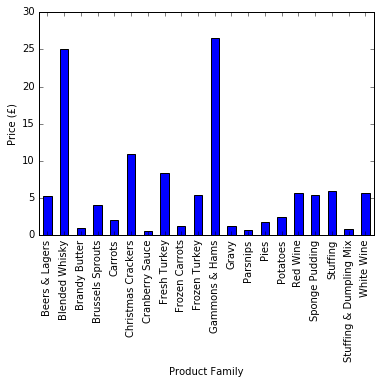

In [8]:
data_2016 = year_data['2016']
bar_plot = data_2016.plot(kind='bar')
bar_plot.set_ylabel('Price (£)')

It's kind of awkward reading rotated labels. Let's try plotting a different way, a horizontal bar chart.

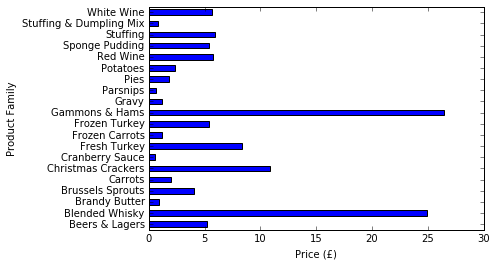

In [9]:
bar_plot = data_2016.plot(kind='barh')
bar_plot.set_xlabel('Price (£)')

## Histograms
Thoughtfully matplotlib has some built in tooling for hisotgrams. No need to calculate frequencies and define bar widths. Just set a list of 'bins' and tell pandas you want a histogram and consider it done.

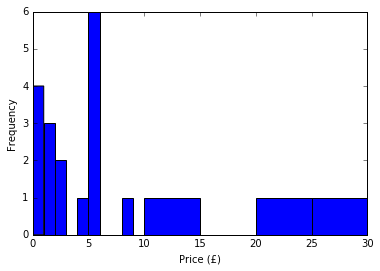

In [21]:
plt.hist(data_2016, bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30])
plt.xlabel('Price (£)')
plt.ylabel('Frequency')

The more astute amongst the audeience may notice that the above is simply a plot of frequencies rather than the fequency densities usually favoured in histograms. Let's create another histogram using this data and frequency densities.

Again matplotlib makes this easy. We just need to supply a normed = 1 argument to the call to plot the histogram.

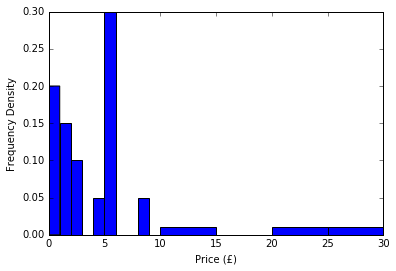

In [23]:
plt.hist(data_2016, bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30], normed = 1)
plt.xlabel('Price (£)')
plt.ylabel('Frequency Density')

### The Normal Distribution
Finally let's make a chart we should also be familiar with, the normal distribution. This shows a couple of different capabilities of the various python packages we're using a pulls all the data visualisation work so far together.

We use NumPy's randn function to get 100,000 random  values from a standard normal distribution. We then split the values into 100 equally sized bins to plot.

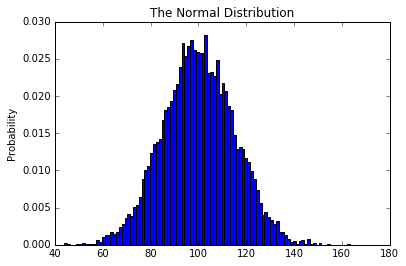

In [27]:
mean = 100
standard_deviation = 15
values = mean + standard_deviation * np.random.randn(10000)
number_of_bins = 100
plt.hist(values, number_of_bins, normed=1)
plt.title('The Normal Distribution')
plt.ylabel('Probability')

Let's also finally add a summary of the values used for the plot to give some measures to the plot.

In [35]:
values.describe()

,0
count,10000.000000
mean,99.941782
std,14.970648
min,44.018553
25%,89.877262
50%,99.771073
75%,110.190825
max,163.374224


The normal distribution is not perfect, but what more would you want from a stochastic process?

This tutorial follows the work of Columbia Univerisity's Application Development Initative for their 2017 DevFest.
We will continue to follow this as we move forwards. The orignal tutorial can be found <a href="https://devfe.st/learn/datascience/">here</a>.

Our thanks to Lucas Schuermann, Rachel Zhang, Zach Robertson, Jillian Knoll and Ashutosh Nanda.

<h4>Questions? <a href="mailto:ian.davies@moodys.com">Contact me by email</a></h4>